In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df = pd.read_csv("data\dataset4.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
# Load data
X = df[['amount', 'newbalanceDest']]

# Extracting Target / Class Labels
y = df['isFraud']

In [5]:
from sklearn.model_selection import train_test_split
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 42) 

In [6]:
from sklearn.linear_model import LogisticRegression
# Create an instance of Logistic Regression Classifier and fit the data.
clf = LogisticRegression(C=1e5)
clf.fit(X_train, y_train)

LogisticRegression(C=100000.0)

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

RuntimeError: `logistic=True` requires statsmodels, an optional dependency, to be installed.

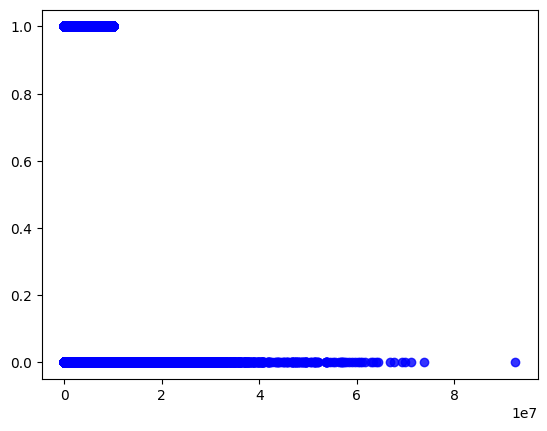

In [8]:
x = df[['amount']]
y = df["isFraud"]

x=x.to_numpy().reshape(-1,1)
y=y.to_numpy()

θ_o=clf.intercept_
θ_1=clf.coef_

#draw logisitc curve using seaborn library
ax=sns.regplot(x="amount", y="isFraud",  data=df, logistic=True, ci=None, 
            scatter_kws={'color': 'blue'}, line_kws={'color': '#df355a'})

plt.xlabel("amount", fontsize=12)
plt.ylabel("is_fraud", fontsize=12)

print(θ_o)
print(θ_1)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#evaluation on training data

y_pred = clf.predict(X_train)

print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(accuracy_score(y_train, y_pred))

[[4447757     299]
 [   5353     425]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4448056
           1       0.59      0.07      0.13      5778

    accuracy                           1.00   4453834
   macro avg       0.79      0.54      0.57   4453834
weighted avg       1.00      1.00      1.00   4453834

0.9987309809930052


In [ ]:
#evaluation on test data

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[166023     53]
 [   640      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    166076
           1       0.00      0.00      0.00       640

    accuracy                           1.00    166716
   macro avg       0.50      0.50      0.50    166716
weighted avg       0.99      1.00      0.99    166716

0.9958432304038005
